In [49]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [50]:
# Loading the dataset
salary_df = pd.read_csv('Salary_Data.csv')

In [51]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [52]:
# Checking the dimensions of the DataFrame
salary_df.shape

(30, 2)

In [53]:
# Checking for any missing values
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [54]:
# Separating the features
X = salary_df.drop(['Salary'], axis=1)
y = salary_df['Salary']

In [55]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Defining a custom Linear Regression class
class MyLinearRegression:

  def __init__(self, lr = 0.01, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.cost_history = []

  def compute_cost(self, y, y_pred, m):
    return (1/(2*m))*np.sum((y_pred-y)**2)

  def fit(self, X, y):
    m, n = X.shape
    self.weights = np.zeros(n)
    self.bias = 0

    # Gradient Descent loop
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      cost = self.compute_cost(y, y_pred, m)
      self.cost_history.append(cost)

      # Calculate gradients for weights (dw) and bias (db)
      dw = (1/m)*np.dot(X.T, (y_pred-y))
      db = (1/m)*np.sum(y_pred - y)

      # Update weights and bias using the learning rate and gradients
      self.weights -= self.lr*dw
      self.bias -= self.lr*db

  def predict(self, X):
    # Make predictions using the learned weights and bias
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

In [57]:
# Creating an instance of the custom MyLinearRegression model with default parameters
mylr = MyLinearRegression()

In [68]:
# Printing the learned weights, bias and cost history of the trained model
print(mylr.weights)
print(mylr.bias)
print(mylr.cost_history)

[9768.48083188]
22997.421972034434
[np.float64(3135539921.2291665), np.float64(1330923937.6621895), np.float64(591129292.1836462), np.float64(287751553.7848793), np.float64(163239706.76223183), np.float64(112036686.62106428), np.float64(90880018.19615026), np.float64(82038609.84354499), np.float64(78245385.36823256), np.float64(76521936.26434933), np.float64(75647560.7821444), np.float64(75121951.78070596), np.float64(74740055.24239044), np.float64(74417826.40295608), np.float64(74120816.05227675), np.float64(73834901.69144052), np.float64(73554291.72275193), np.float64(73276608.9773148), np.float64(73000875.70299403), np.float64(72726687.71340263), np.float64(72453875.91350481), np.float64(72182367.57610437), np.float64(71912129.48606028), np.float64(71643144.63792011), np.float64(71375402.68539283), np.float64(71108896.0270013), np.float64(70843618.20171888), np.float64(70579563.23135084), np.float64(70316725.35093896), np.float64(70055098.89819747), np.float64(69794678.26812786), np

In [69]:
# Training the custom linear regression model using the training data
mylr.fit(X_train, y_train)

In [70]:
# Making predictions on the training data using the trained model
y_pred_train = mylr.predict(X_train)
print(y_pred_train)

[123612.77454041 107983.2052094   62071.34529956  33742.7508871
  44488.07980217  72816.67421463  51326.01638449  63048.19338275
  62071.34529956 100168.42054389  35696.44705348  37650.14321986
 110913.74945896  42534.3836358   92353.63587839 115797.9898749
  80631.45888013 125566.47070678  89423.09162882  54256.56063405
  61094.49721637  66955.5857155   81608.30696332  52302.86446768]


In [71]:
# Calculating evaluation metrics (MSE, RMSE, R2 Score) on the training set
mse_train = np.mean((y_train - y_pred_train) ** 2)

rmse_train = np.sqrt(mse_train)

ss_res_train = np.sum((y_train - y_pred_train) ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)


print("MSE on Training Set:", mse_train)
print("RMSE on Training Set:", rmse_train)
print("R2 Score on Training Set:", r2_train)

MSE on Training Set: 28375892.243814986
RMSE on Training Set: 5326.90268766147
R2 Score on Training Set: 0.9628737582957667


In [72]:
# Making predictions on the testing data using the trained model
y_pred_test = mylr.predict(X_test)
print(y_pred_test)

[116774.83795809  70862.97804825 103098.96479346  74770.370381
  54256.56063405  59140.80104999]


In [73]:
# Calculating evaluation metrics (MSE, RMSE, R2 Score) on the testing set
mse_test = np.mean((y_test - y_pred_test) ** 2)

rmse_test = np.sqrt(mse_test)

ss_res_test = np.sum((y_test - y_pred_test) ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

print("MSE on Test Set:", mse_test)
print("RMSE on Test Set:", rmse_test)
print("R2 Score on Test Set:", r2_test)

MSE on Test Set: 52876610.79496228
RMSE on Test Set: 7271.630545824112
R2 Score on Test Set: 0.8964819289205342


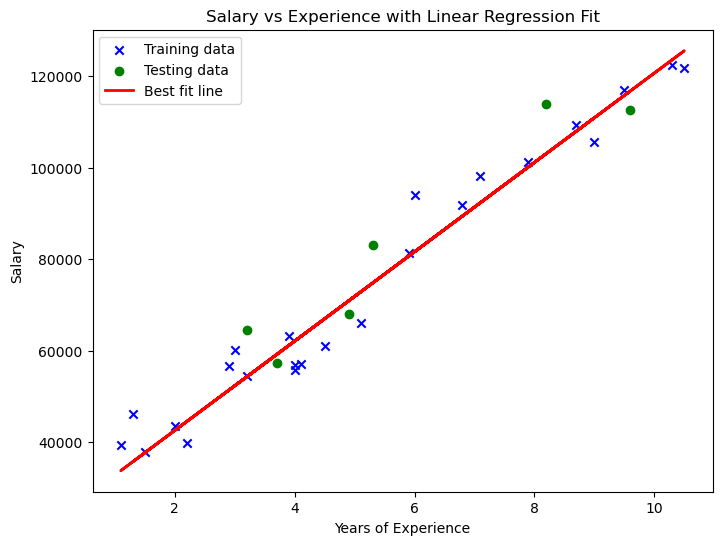

In [74]:
# Visualizing the training and testing data along with the best-fit line from the trained model
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, marker='x', color='blue', label='Training data')
plt.scatter(X_test, y_test, marker='o', color='green', label='Testing data')
plt.plot(X_train, mylr.predict(X_train), color='red', linewidth=2, label='Best fit line')
plt.title('Salary vs Experience with Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

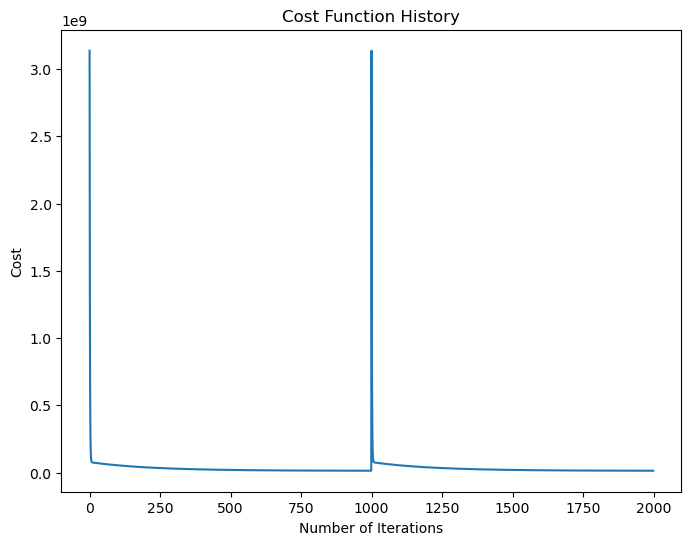

In [75]:
# Plotting the cost history to visualize how the cost function decreased during training
plt.figure(figsize=(8, 6))
plt.plot(mylr.cost_history)
plt.title('Cost Function History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [76]:
# Example prediction-1
predicted_salary_9_3 = 9.3 * mylr.weights[0] + mylr.bias
print(f"Predicted salary for 9.3 years of experience will be ${predicted_salary_9_3}")

Predicted salary for 9.3 years of experience will be $113844.29370852595


In [77]:
# Example prediction-2
predicted_salary_5 = 5 * mylr.weights[0] + mylr.bias
print(f"Predicted salary for 5 years of experience will be ${predicted_salary_5}")

Predicted salary for 5 years of experience will be $71839.82613143847
